<a href="https://colab.research.google.com/github/tanjascats/dissertation/blob/main/experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
# fetch dataset
breast_cancer = fetch_ucirepo(id=14)

# data (as pandas dataframes)
X = breast_cancer.data.features
y = breast_cancer.data.targets

# metadata
print(breast_cancer.metadata)

# variable information
print(breast_cancer.variables)


{'uci_id': 14, 'name': 'Breast Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/14/breast+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/14/data.csv', 'abstract': 'This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 286, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C51P4M', 'creators': ['Matjaz Zwitter', 'Milan Soklic'], 'intro_paper': None, 'additional_info': {'summary': 'Thi

In [4]:
X

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...
281,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,40-49,ge40,30-34,5-Mar,no,3,left,left_low,no


In [5]:
# fix values
X.fillna('?', inplace=True)
X['tumor-size'] = X['tumor-size'].replace({'9-May': '05-9', '14-Oct': '10-14'})
X['inv-nodes'] = X['inv-nodes'].replace({'11-Sep': '9-11', '14-Dec': '12-14', '5-Mar': '3-5', '8-Jun': '6-8'})

<ipython-input-5-30fd74693486>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna('?', inplace=True)
<ipython-input-5-30fd74693486>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tumor-size'] = X['tumor-size'].replace({'9-May': '05-9', '14-Oct': '10-14'})
<ipython-input-5-30fd74693486>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [6]:
class CustomLabelEncoder:
    def __init__(self):
        self.class_mapping = {}

    def fit(self, data):
        unique_classes = sorted(set(data))  # Sort the data and remove duplicates
        self.class_mapping = {label: idx for idx, label in enumerate(unique_classes)}

    def transform(self, data):
        return [self.class_mapping.get(item, -1)  # Return -1 or any other placeholder for unseen categories
                for item in data]

    def inverse_transform(self, encoded_data):
        inv_map = {v: k for k, v in self.class_mapping.items()}
        return [inv_map.get(item, 'Unknown')  # Handle unknown items
                for item in encoded_data]

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

In [7]:
class RangeEncoder:
    def __init__(self):
        self.class_mapping = {}

    def fit(self, data):
        unique_classes = sorted(set(data))  # Sort the data and remove duplicates
        class_map = {int(c.split('-')[0]):c for c in unique_classes}
        temp_classes = sorted([int(c.split('-')[0]) for c in unique_classes])

        self.class_mapping = {class_map[label]: idx for idx, label in enumerate(temp_classes)}

    def transform(self, data):
        return [self.class_mapping.get(item, -1)  # Return -1 or any other placeholder for unseen categories
                for item in data]

    def inverse_transform(self, encoded_data):
        inv_map = {v: k for k, v in self.class_mapping.items()}
        return [inv_map.get(item, 'Unknown')  # Handle unknown items
                for item in encoded_data]

    def fit_transform(self, data):
        self.fit(data)
        return self.transform(data)

In [8]:
# label encoder
enc_age = CustomLabelEncoder()
X['age'] = enc_age.fit_transform(X['age'])
enc_meno = CustomLabelEncoder()
X['menopause'] = enc_meno.fit_transform(X['menopause'])
enc = CustomLabelEncoder()
X['tumor-size'] = enc.fit_transform(X['tumor-size'])
X['node-caps'] = enc.fit_transform(X['node-caps'])
X['breast'] = enc.fit_transform(X['breast'])
X['breast-quad'] = enc.fit_transform(X['breast-quad'])
X['irradiat'] = enc.fit_transform(X['irradiat'])
range_enc = RangeEncoder()
X['inv-nodes'] = range_enc.fit_transform(X['inv-nodes'])

<ipython-input-8-70a35c36108f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = enc_age.fit_transform(X['age'])
<ipython-input-8-70a35c36108f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['menopause'] = enc_meno.fit_transform(X['menopause'])
<ipython-input-8-70a35c36108f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [9]:
range_enc.class_mapping

{'0-2': 0, '3-5': 1, '6-8': 2, '9-11': 3, '12-14': 4, '15-17': 5, '24-26': 6}

In [10]:
fp_data = pd.read_csv('fp_data_100.csv')
fp_data = fp_data.drop(['Id'], axis=1)

In [11]:
fp_data_blind = pd.read_csv('fp_data_blind_100.csv')
fp_data_blind = fp_data_blind.drop(['Id'], axis=1)

In [12]:
fp_data_blind_corr = pd.read_csv('fp_data_blind_corr_100.csv')
fp_data_blind_corr = fp_data_blind_corr.drop(['Id'], axis=1)

In [13]:
fp_data_rand = pd.read_csv('fp_data_random_100.csv')
fp_data_rand = fp_data_rand.drop(['Id'], axis=1)

In [14]:
fp_data.head(5)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
0,30-39,premeno,30-34,6-8,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,25-29,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,right_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,3,right,right_low,no,no-recurrence-events


In [15]:
fp_data_blind.head(5)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
0,30-39,premeno,25-29,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [16]:
# label encoder
enc_age = CustomLabelEncoder()
fp_data['age'] = enc_age.fit_transform(fp_data['age'])
enc_meno = CustomLabelEncoder()
fp_data['menopause'] = enc_meno.fit_transform(fp_data['menopause'])
enc = CustomLabelEncoder()
fp_data['tumor-size'] = enc.fit_transform(fp_data['tumor-size'])
enc_nodecaps = CustomLabelEncoder()
fp_data['node-caps'] = enc_nodecaps.fit_transform(fp_data['node-caps'])
enc = CustomLabelEncoder()
fp_data['breast'] = enc.fit_transform(fp_data['breast'])
fp_data['breast-quad'] = enc.fit_transform(fp_data['breast-quad'])
fp_data['irradiat'] = enc.fit_transform(fp_data['irradiat'])
enc_invnodes = RangeEncoder()
fp_data['inv-nodes'] = enc_invnodes.fit_transform(fp_data['inv-nodes'])

In [17]:
# label encoder
fp_data_blind['age'] = enc.fit_transform(fp_data_blind['age'])
fp_data_blind['menopause'] = enc.fit_transform(fp_data_blind['menopause'])
fp_data_blind['tumor-size'] = enc.fit_transform(fp_data_blind['tumor-size'])
fp_data_blind['node-caps'] = enc.fit_transform(fp_data_blind['node-caps'])
fp_data_blind['breast'] = enc.fit_transform(fp_data_blind['breast'])
fp_data_blind['breast-quad'] = enc.fit_transform(fp_data_blind['breast-quad'])
fp_data_blind['irradiat'] = enc.fit_transform(fp_data_blind['irradiat'])
range_enc = RangeEncoder()
fp_data_blind['inv-nodes'] = range_enc.fit_transform(fp_data_blind['inv-nodes'])

In [18]:
# label encoder
fp_data_blind_corr['age'] = enc.fit_transform(fp_data_blind_corr['age'])
fp_data_blind_corr['menopause'] = enc.fit_transform(fp_data_blind_corr['menopause'])
fp_data_blind_corr['tumor-size'] = enc.fit_transform(fp_data_blind_corr['tumor-size'])
fp_data_blind_corr['node-caps'] = enc.fit_transform(fp_data_blind_corr['node-caps'])
fp_data_blind_corr['breast'] = enc.fit_transform(fp_data_blind_corr['breast'])
fp_data_blind_corr['breast-quad'] = enc.fit_transform(fp_data_blind_corr['breast-quad'])
fp_data_blind_corr['irradiat'] = enc.fit_transform(fp_data_blind_corr['irradiat'])
range_enc = RangeEncoder()
fp_data_blind_corr['inv-nodes'] = range_enc.fit_transform(fp_data_blind_corr['inv-nodes'])

In [19]:
# label encoder
fp_data_rand['age'] = enc.fit_transform(fp_data_rand['age'])
fp_data_rand['menopause'] = enc.fit_transform(fp_data_rand['menopause'])
fp_data_rand['tumor-size'] = enc.fit_transform(fp_data_rand['tumor-size'])
fp_data_rand['node-caps'] = enc.fit_transform(fp_data_rand['node-caps'])
fp_data_rand['breast'] = enc.fit_transform(fp_data_rand['breast'])
fp_data_rand['breast-quad'] = enc.fit_transform(fp_data_rand['breast-quad'])
fp_data_rand['irradiat'] = enc.fit_transform(fp_data_rand['irradiat'])
range_enc = RangeEncoder()
fp_data_rand['inv-nodes'] = range_enc.fit_transform(fp_data_rand['inv-nodes'])

## Results


We analysed our method for fingerprinting categorical data on Breast Cancer dataset. The dataset contains features:
* Ordinal attributes: age, tumor-size, inv-nodes, deg-malig  
* Categorical: menopause(3), node-caps(2), breast(2), breast-quad(4), irradiat(2)
And a target 'recurrence' of categorical type.





In [20]:
ordinal = ['age', 'tumor-size', 'inv-nodes', 'deg-malig']
categorical = ['menopause', 'node-caps', 'breast', 'breast-quad']

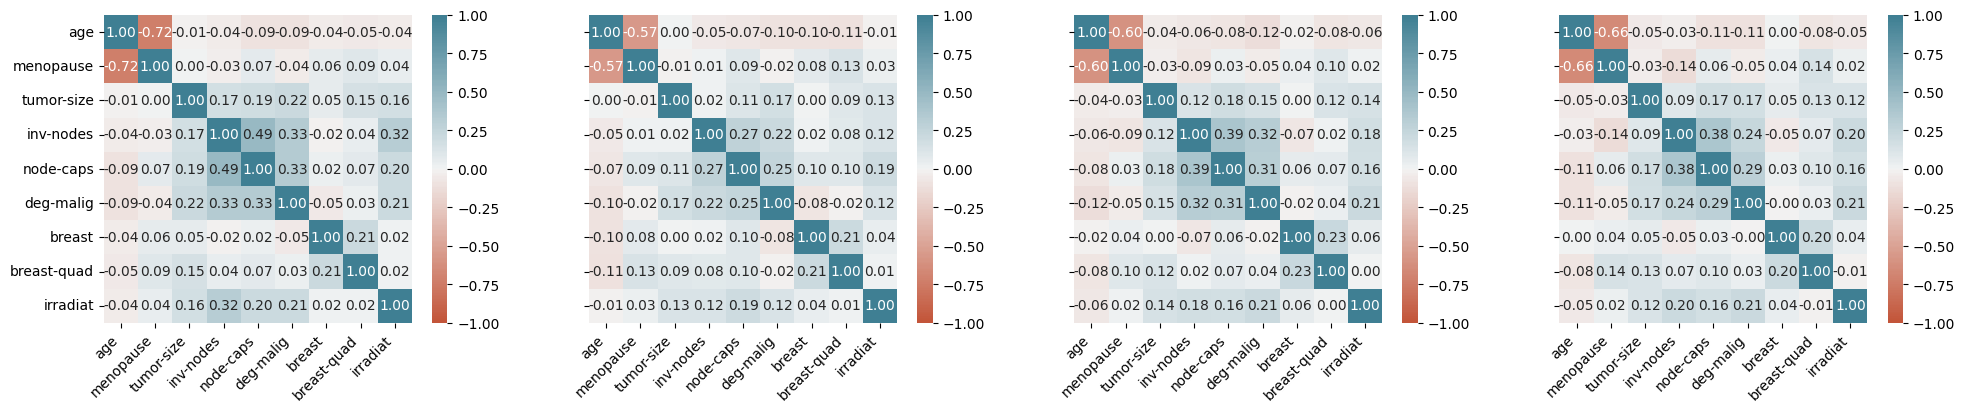

In [21]:
# correlation between ordinal variables in oridinal dataset: original -- random fingerprint -- knn fingerprint
fig, axs = plt.subplots(1, 4, figsize=(24,4), sharey='all')
axs = axs.flat
#fig.suptitle('Correlation matrices')

# original
corr = X.corr()
sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".2f",
    ax = axs[0]
)
axs[0].set_xticklabels(
    axs[0].get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#axs[0].set_title('Original data')

# random
corr = fp_data_rand.drop(['recurrence'], axis=1).corr()
sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".2f",
    ax = axs[1]
)
axs[1].set_xticklabels(
    axs[1].get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#axs[1].set_title('Random embedding')

# knn scheme
corr = fp_data_blind.drop(['recurrence'], axis=1).corr()
sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".2f",
    ax = axs[2]
)
axs[2].set_xticklabels(
    axs[2].get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#axs[2].set_title('NN scheme w/o correlations')

# knn scheme; defined correlations
corr = fp_data_blind_corr.drop(['recurrence'], axis=1).corr()
sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt=".2f",
    ax = axs[3]
)
axs[3].set_xticklabels(
    axs[3].get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
#axs[3].set_title('NN scheme using correlations')

In [22]:
# first decode the values
X['age'] = enc_age.inverse_transform(X['age'])
X['menopause'] = enc_meno.inverse_transform(X['menopause'])

fp_data = pd.read_csv('fp_data_100.csv')
fp_data = fp_data.drop(['Id'], axis=1)

fp_data_rand = pd.read_csv('fp_data_random_100.csv')
fp_data_rand = fp_data_rand.drop(['Id'], axis=1)

fp_data_blind = pd.read_csv('fp_data_blind_100.csv')
fp_data_blind = fp_data_blind.drop(['Id'], axis=1)

fp_data_blind_corr = pd.read_csv('fp_data_blind_corr_501.csv')
fp_data_blind_corr = fp_data_blind_corr.drop(['Id'], axis=1)

<ipython-input-22-f88ce69bd7a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['age'] = enc_age.inverse_transform(X['age'])
<ipython-input-22-f88ce69bd7a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['menopause'] = enc_meno.inverse_transform(X['menopause'])


[Text(0.5, 0, '20-29'),
 Text(1.5, 0, '30-39'),
 Text(2.5, 0, '40-49'),
 Text(3.5, 0, '50-59'),
 Text(4.5, 0, '60-69'),
 Text(5.5, 0, '70-79')]

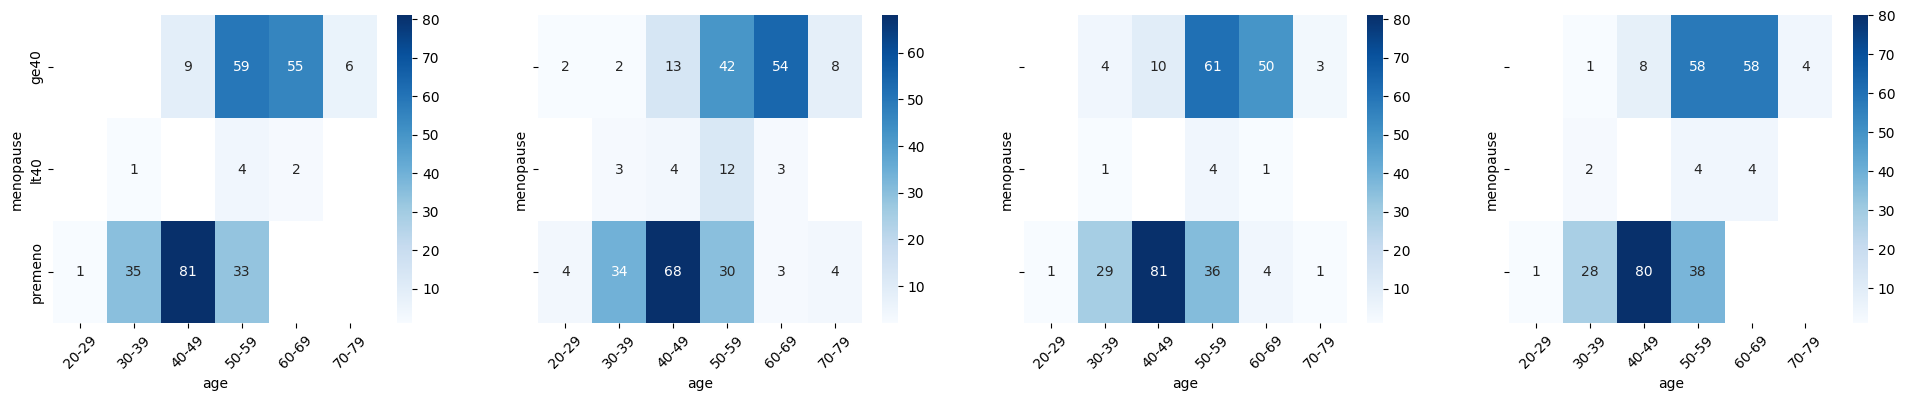

In [28]:
# We investigate the pairwise attribute distributions of correlated attributes.
# E.g., age and menopause
fig, axs = plt.subplots(1, 4, figsize=(24,4), sharey='all')
axs = axs.flat
#fig.suptitle('Pairwise attribute distributions')

############
# ORIGINAL #
############
# age vs menopause
df_2dhist = pd.DataFrame({
    x_label: grp['menopause'].value_counts()
    for x_label, grp in X.groupby('age')
})
sns.heatmap(df_2dhist, cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=axs[0])
axs[0].set_xlabel('age')
axs[0].set_ylabel('menopause')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)
#axs[0].set_title('Original data')


# random embedding
df_2dhist = pd.DataFrame({
    x_label: grp['menopause'].value_counts()
    for x_label, grp in fp_data_rand.groupby('age')
})
sns.heatmap(df_2dhist, cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=axs[1])
axs[1].set_xlabel('age')
axs[1].set_ylabel('menopause')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)
#axs[1].set_title('Random embedding')


# NN scheme without correlations
df_2dhist = pd.DataFrame({
    x_label: grp['menopause'].value_counts()
    for x_label, grp in fp_data_blind.groupby('age')
})
sns.heatmap(df_2dhist, cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=axs[2])
axs[2].set_xlabel('age')
axs[2].set_ylabel('menopause')
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45)
#axs[2].set_title('NN scheme w/o correlations')


# NN scheme with correlations
df_2dhist = pd.DataFrame({
    x_label: grp['menopause'].value_counts()
    for x_label, grp in fp_data_blind_corr.groupby('age')
})
sns.heatmap(df_2dhist, cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=axs[3])
axs[3].set_xlabel('age')
axs[3].set_ylabel('menopause')
axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=45)
#axs[3].set_title('NN scheme using correlations')

In [24]:
# first decode the values
X['node-caps'] = enc_nodecaps.inverse_transform(X['node-caps'])
X['inv-nodes'] = enc_invnodes.inverse_transform(X['inv-nodes'])

<ipython-input-24-995c3a35432a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['node-caps'] = enc_nodecaps.inverse_transform(X['node-caps'])
<ipython-input-24-995c3a35432a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['inv-nodes'] = enc_invnodes.inverse_transform(X['inv-nodes'])


[]

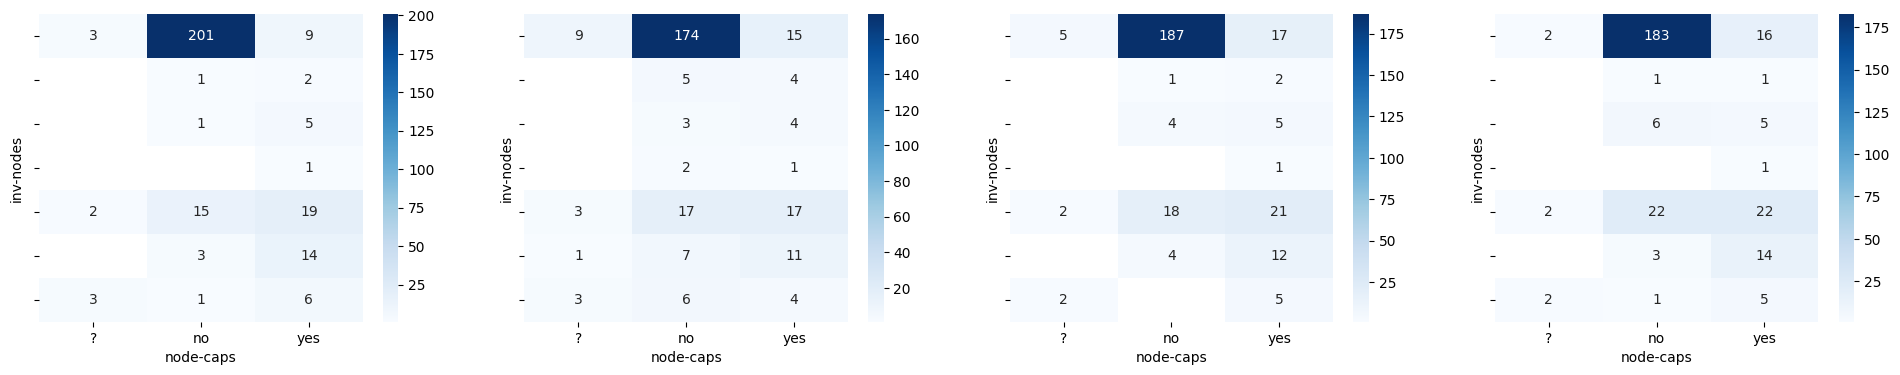

In [27]:
# E.g., inv-nodes and node-caps
fig, axs = plt.subplots(1, 4, figsize=(24,4), sharey='all')
axs = axs.flat
#fig.suptitle('Pairwise attribute distributions')

############
# ORIGINAL #
############
# node-caps vs inv-nodes
df_2dhist = pd.DataFrame({
    x_label: grp['inv-nodes'].value_counts()
    for x_label, grp in X.groupby('node-caps')
})
sns.heatmap(df_2dhist, fmt=".0f", cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=axs[0])
axs[0].set_xlabel('node-caps')
axs[0].set_ylabel('inv-nodes')
axs[0].set_yticklabels(axs[0].get_yticklabels(), rotation=45)
#axs[0].set_title('Original data')


# random embedding
df_2dhist = pd.DataFrame({
    x_label: grp['inv-nodes'].value_counts()
    for x_label, grp in fp_data_rand.groupby('node-caps')
})
sns.heatmap(df_2dhist, fmt=".0f", cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=axs[1])
axs[1].set_xlabel('node-caps')
axs[1].set_ylabel('inv-nodes')
axs[1].set_yticklabels(axs[1].get_yticklabels(), rotation=45)
#axs[1].set_title('Random embedding')


# NN scheme without correlations
df_2dhist = pd.DataFrame({
    x_label: grp['inv-nodes'].value_counts()
    for x_label, grp in fp_data_blind.groupby('node-caps')
})
sns.heatmap(df_2dhist, fmt=".0f", cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=axs[2])
axs[2].set_xlabel('node-caps')
axs[2].set_ylabel('inv-nodes')
axs[2].set_yticklabels(axs[2].get_yticklabels(), rotation=45)
#axs[2].set_title('NN scheme w/o correlations')


# NN scheme with correlations
df_2dhist = pd.DataFrame({
    x_label: grp['inv-nodes'].value_counts()
    for x_label, grp in fp_data_blind_corr.groupby('node-caps')
})
sns.heatmap(df_2dhist, fmt=".0f", cmap=sns.color_palette("Blues", as_cmap=True), annot=True, ax=axs[3])
axs[3].set_xlabel('node-caps')
axs[3].set_ylabel('inv-nodes')
axs[3].set_yticklabels(axs[3].get_yticklabels(), rotation=45)
#axs[3].set_title('NN scheme using correlations')

In [26]:
# we can see how NN fingerprinting shifts the distribution towards more frequent values instead of the least frequent